# 4 Case Study: ER Injuries  

## 4.1 Introduction  

To reinforce key concepts, we’ll build a Shiny app exploring an ER injuries dataset. We'll start with data analysis outside Shiny, then gradually enhance the app.  

First, let’s install and load the required packages: **Shiny**, **vroom** (for fast file reading), and **tidyverse** (for data analysis).  


In [1]:
library(shiny)

if (!requireNamespace("vroom", quietly = TRUE)) {
  install.packages("vroom")  # Install vroom package
}
library(vroom)

if (!requireNamespace("tidyverse", quietly = TRUE)) {
  install.packages("tidyverse")  # Install tidyverse package
}
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_character()   masks vroom::col_character()
✖ readr::col_date()        masks vroom::col_date()
✖ readr::col_datetime()    masks vroom::col_datetime()
✖ readr::col_double()      masks vroom::col_double()
✖ readr::col_factor()      masks vroom::col_factor()
✖ readr::col_guess()       masks vroom::col_guess()
✖ readr::col_integer()     masks vroom::col_integer()
✖ readr::col_logical()     masks vroom::col_logical()
✖ readr::col_number()      masks vroom::col_number()
✖ readr::col_skip()        masks vroom::col_skip()
✖ readr::col_time()        masks vroom::col_time()
✖ readr::cols()            masks vroom::cols()
✖ readr::date_names_lang(

# 4.2 The Data  

We’ll explore data from the **National Electronic Injury Surveillance System (NEISS)**, collected by the **Consumer Product Safety Commission**. This long-term study records accidents reported in a representative sample of U.S. hospitals.  

It's an engaging dataset because it's familiar to most people, and each observation includes a **short narrative** describing the accident. More details are available at [GitHub: hadley/neiss](https://github.com/hadley/neiss).  

For this section, we’ll focus on **2017 data**.  
If you want to get the data on to your own computer, run this code:


In [2]:
dir.create("neiss")
#> Warning in dir.create("neiss"): 'neiss' already exists
download <- function(name) {
  url <- "https://raw.github.com/hadley/mastering-shiny/main/neiss/"
  download.file(paste0(url, name), paste0("neiss/", name), quiet = TRUE)
}
download("injuries.tsv.gz")
download("population.tsv")
download("products.tsv")

The main dataset we’ll use is injuries, which contains around 250,000 observations:

In [3]:
injuries <- vroom::vroom("neiss/injuries.tsv.gz")
injuries

Rows: 255064 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (6): sex, race, body_part, diag, location, narrative
dbl  (3): age, prod_code, weight
date (1): trmt_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


trmt_date,age,sex,race,body_part,diag,location,prod_code,weight,narrative
<date>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2017-01-01,71,male,white,Upper Trunk,Contusion Or Abrasion,Other Public Property,1807,77.6641,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION
2017-01-01,16,male,white,Lower Arm,"Burns, Thermal",Home,676,77.6641,"16YOM TRIPPED OVER A RUG AND FELL INTO A BURNING FIREPLACEDX BURNS INVOLVING LESS THAN 10% OF BODY SURFACE, FOREARM"
2017-01-01,58,male,white,Upper Trunk,Contusion Or Abrasion,Home,649,77.6641,"58 YOM WENT TO BATHROOM; LOST HIS BALANCE, FELL TO FLOOR HIT UPPER BACK ON TOILET. CONTUSION OF UPPER BACK."
2017-01-01,21,male,white,Lower Trunk,"Strain, Sprain",Home,4076,77.6641,"21 YOM TURNED WRONG AS HE GOT OUT OF BED. TWISTED LOWER BACK. STRAIN, LOWER BACK. (ACUTE EXACERBATION OF LOW BACK DISORDER)"
2017-01-01,54,male,white,Head,Inter Organ Injury,Other Public Property,1807,77.6641,54 YOM WAS FOUND ON FLOOR OF NURSING HOME WHERE HE RESIDES; HAD FALLEN TO THE FLOOR. SUBDURAL HEMATOMA.
2017-01-01,21,male,white,Hand,Fracture,Home,1884,77.6641,"21 YOM HIT WALL IN ANGER; HAD RESULTANT PAIN OF RT. HAND. .FX, RT. HAND"
2017-01-01,35,female,not stated,Lower Trunk,"Strain, Sprain",Home,1807,87.0904,35YOF STR LWR BACK GETTING UP FROM FLOOR
2017-01-01,62,female,not stated,Lower Arm,Laceration,Home,4074,87.0904,62YOF LAC LWR ARM- FELL AGAINST CHAIR
2017-01-01,22,male,not stated,Knee,Dislocation,Home,4076,87.0904,22YOM D'LOC KNEE REPOSITIONING SELF IN BED


Each row in the dataset represents a single accident with **10 variables**:  

- **trmt_date** – Date the person was seen in the hospital.  
- **age, sex, race** – Demographic details of the injured person.  
- **body_part** – Location of the injury (e.g., ankle, ear).  
- **location** – Where the accident happened (e.g., home, school).  
- **diag** – Basic diagnosis (e.g., fracture, laceration).  
- **prod_code** – Product associated with the injury.  
- **weight** – Estimated number of similar injuries in the U.S. population.  
- **narrative** – Brief description of how the accident occurred.  

We’ll also use two additional datasets:  
- **products** – Maps product codes to product names.  
- **population** – Provides the U.S. population in 2017 by age and sex.  


In [4]:
products <- vroom::vroom("neiss/products.tsv")
products

Rows: 38 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): title
dbl (1): prod_code

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


prod_code,title
<dbl>,<chr>
464,"knives, not elsewhere classified"
474,tableware and accessories
604,"desks, chests, bureaus or buffets"
611,bathtubs or showers
649,toilets
676,"rugs or carpets, not specified"
679,"sofas, couches, davenports, divans or st"
1141,"containers, not specified"
1200,"sports or recreational activity, n.e.c."


In [5]:
population <- vroom::vroom("neiss/population.tsv")
population

Rows: 170 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): sex
dbl (2): age, population

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,population
<dbl>,<chr>,<dbl>
0,female,1924145
0,male,2015150
1,female,1943534
1,male,2031718
2,female,1965150
2,male,2056625
3,female,1956281
3,male,2050474
4,female,1953782


# 4.3 Exploration  

Before building the app, let's explore the data. We'll start with an interesting product: **649, "toilets"**.  

First, we'll extract injuries related to this product.  


In [6]:
selected <- injuries %>% filter(prod_code == 649)
nrow(selected)
#> [1] 2993

[1] 2993

Next, we’ll summarize **toilet-related injuries** by **location**, **body part**, and **diagnosis**.  

We'll use the **weight** variable to estimate total injuries across the U.S.  


In [7]:
selected %>% count(location, wt = weight, sort = TRUE)

location,n
<chr>,<dbl>
Home,99603.1282
Other Public Property,18662.8753
Unknown,16267.4425
School,658.9078
Street Or Highway,16.1828
Sports Or Recreation Place,14.7756


In [8]:
selected %>% count(body_part, wt = weight, sort = TRUE)

body_part,n
<chr>,<dbl>
Head,31369.8516
Lower Trunk,26854.9891
Face,13015.8050
Upper Trunk,12508.2622
Knee,6967.6275
N.S./Unk,6741.3277
Lower Leg,5086.5870
Shoulder,3590.4152
All Of Body,3437.8113


In [9]:
selected %>% count(diag, wt = weight, sort = TRUE)

diag,n
<chr>,<dbl>
Other Or Not Stated,32896.9686
Contusion Or Abrasion,22493.3176
Inter Organ Injury,21525.4240
Fracture,21497.4841
Laceration,18734.4788
"Strain, Sprain",7608.8992
Dislocation,2712.7536
Hematoma,2386.2644
Avulsion,1777.7466


As expected, **toilet-related injuries** most often occur at home. The most common body parts suggest these are likely **falls** (since the head and face are rarely involved in routine toilet usage), and the diagnoses vary widely.  

Next, we’ll explore the injury patterns across **age** and **sex**. Given the amount of data, a table would be less helpful, so we’ll create a plot to make the patterns more apparent.  


In [10]:
summary <- selected %>% 
  count(age, sex, wt = weight)
summary

age,sex,n
<dbl>,<chr>,<dbl>
0,female,4.7570
0,male,14.2710
1,female,253.3526
1,male,231.4887
2,female,438.1403
2,male,631.8107
3,female,380.6827
3,male,1004.2973
4,female,260.7669


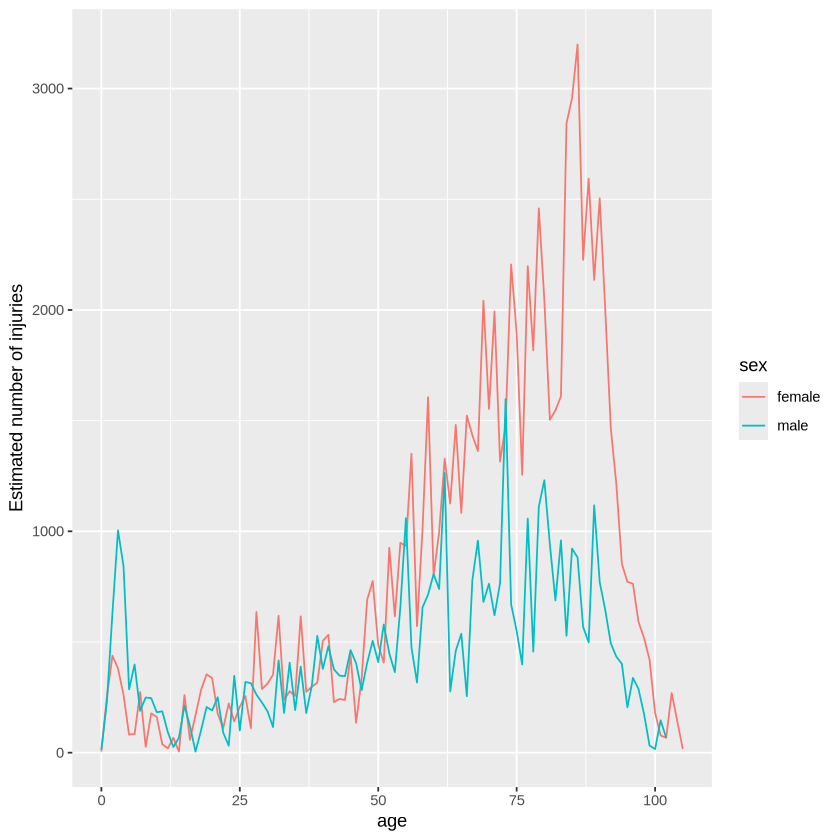

In [11]:
summary %>% 
  ggplot(aes(age, n, colour = sex)) + 
  geom_line() + 
  labs(y = "Estimated number of injuries")

The data reveals a **spike in injuries for young boys**, peaking at age 3, and an **increase for women** starting around middle age, with a gradual decline after age 80. The peak for young boys is likely due to the fact that they typically use the toilet standing up. The increase for women may be related to **osteoporosis** (women may experience injuries at the same rate as men, but more women end up in the ER due to their higher risk


One problem with interpreting this pattern is that we know there are fewer older people than younger people, so the population available to be injured is smaller. We can control for this by comparing the number of people injured with the total population and calculating an injury rate. Here, I use a rate per 10,000.


In [12]:
summary <- selected %>% 
  count(age, sex, wt = weight) %>% 
  left_join(population, by = c("age", "sex")) %>% 
  mutate(rate = n / population * 1e4)

summary

age,sex,n,population,rate
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
0,female,4.7570,1924145,0.02472267
0,male,14.2710,2015150,0.07081855
1,female,253.3526,1943534,1.30356660
1,male,231.4887,2031718,1.13937417
2,female,438.1403,1965150,2.22955143
2,male,631.8107,2056625,3.07207537
3,female,380.6827,1956281,1.94595102
3,male,1004.2973,2050474,4.89787873
4,female,260.7669,1953782,1.33467756


Plotting the **injury rate** reveals a different trend, especially after age 50. The difference between **men and women** becomes much smaller, and the decline seen in the raw data disappears.  

This change is likely due to the fact that **women tend to live longer than men**, so at older ages, there are more women alive to be injured by toilets.  


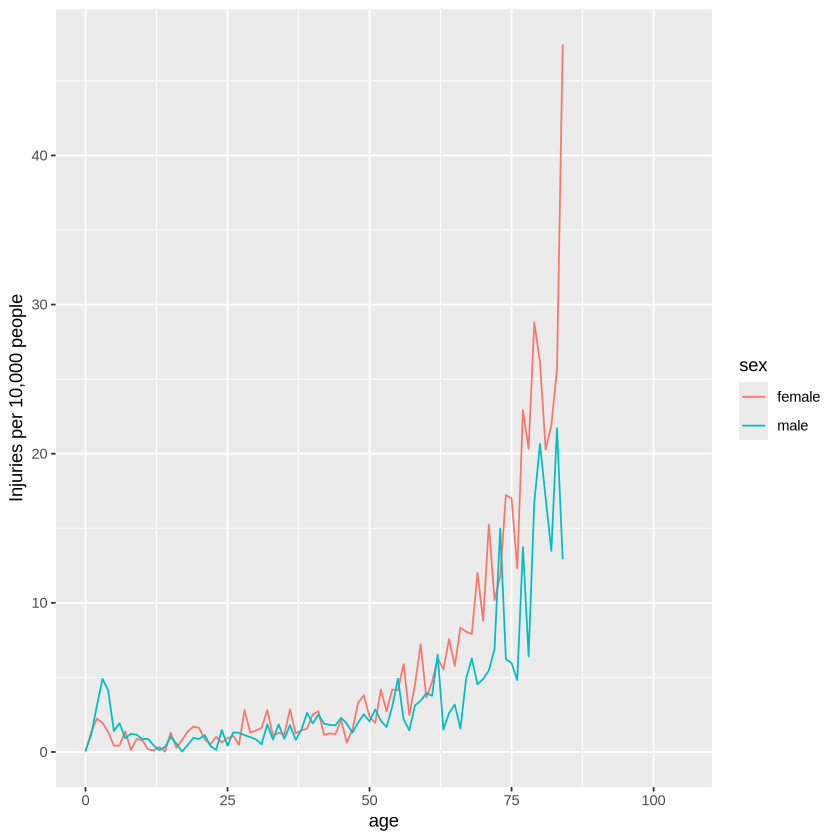

In [13]:
summary %>% 
  ggplot(aes(age, rate, colour = sex)) + 
  geom_line(na.rm = TRUE) + 
  labs(y = "Injuries per 10,000 people")

Finally, we can look at some of the narratives. Browsing through these is an informal way to check our hypotheses, and generate new ideas for further exploration. Here I pull out a random sample of 10:

In [14]:
selected %>% 
  sample_n(10) %>% 
  pull(narrative)

[1] "61YOF W/LUMBAR MUSCLE STRAIN. REPORTS WAS SITTING ON TOILET & WHEN SHEWENT TO STAND UP SHE HAD ACUTE ONSET OF LUMBAR PAIN."
 [2] "70 YOF - SYNCOPE - PT WAS SITTING ON TOILET AND FELL @ HOME."                                                              
 [3] "68YOF S/P FALL HIT HEAD ON TOILET FOUND ON FLOORDX:MECHANICAL FALL,BHT,LOW BACK STRAIN,CULT CONTS"                         
 [4] "77 YOM WITH SYNCOPE WHILE SITTING ON TOILET FELL AND STRUCK HIS HEAD ONTHE WALL DX NO INJURY"                              
 [5] "91YOF INJ/BP NS- STOOD FROM BEDSIDE TOILET, FELL ON BED"                                                                   
 [6] "34YOF STANDING UP FROM TOILET AND PUT DIRECT WEIGHT ON R FOOT W SUDDENONSET OF R ANKLE AND LEG PAIN  DX R LEG PAIN"        
 [7] "28YOF CLSD HD INJ- SYNC & SEIZURE, FELL OFF TOILET ONTO FLOOR AT ***"                                                      
 [8] "42YOF HIP PAIN STANDING FROM TOILET"                                                                                       
 [9] "69YF AMB C CANE WAS ATTEMPTING TO LOWER SELF DOWN ON THE TOILET&MISSEDIT FALLING BWD>>HUMRUS FX, HYPOTENSION"              
[10] "77YOF AT HOME TRYING TO GET UP FROM TOILET WITH WALKER LOST BALANCEFELL DX R KNEE SPRAIN MECH FALL, SEPSIS 2ND TO UTI"

📌 *Having explored the data for one product, it would be useful to repeat this process for other products without retyping the code each time.*  

 So, let’s build a **Shiny app** to easily explore different products!  


# 4.4 Prototype  

When building a complex app, it's best to start as simple as possible to confirm the basic mechanics work before adding complexity. For this app, we’ll begin with one input (the product code), three tables, and one plot.  

Designing the first prototype involves balancing simplicity with future flexibility. Too narrow a focus may require a lot of rework later, while over-planning could result in wasted effort. To strike this balance, I often sketch the **UI** and **reactive graph** on paper before committing to code.  

For this prototype:  
- **One row** for the input (with the understanding that more inputs may be added later)  
- **One row** for the three tables, with each table taking up 4 columns (out of the 12-column width)  
- **One row** for the plot  


In [15]:
prod_codes <- setNames(products$prod_code, products$title)

ui <- fluidPage(
  fluidRow(
    column(6,
      selectInput("code", "Product", choices = prod_codes)
    )
  ),
  fluidRow(
    column(4, tableOutput("diag")),
    column(4, tableOutput("body_part")),
    column(4, tableOutput("location"))
  ),
  fluidRow(
    column(12, plotOutput("age_sex"))
  )
)

The **server function** is straightforward. We first convert the selected and summary variables (from the previous section) into **reactive expressions**. This is a common approach: you create variables in your data analysis to break the process into steps, and avoid redundant computations, which reactive expressions help manage in Shiny apps.

It's often useful to spend some time cleaning up your analysis code before starting the Shiny app. This allows you to think through the problem in regular R code, without the added complexity of reactivity.  


In [16]:
server <- function(input, output, session) {
  selected <- reactive(injuries %>% filter(prod_code == input$code))

  output$diag <- renderTable(
    selected() %>% count(diag, wt = weight, sort = TRUE)
  )
  output$body_part <- renderTable(
    selected() %>% count(body_part, wt = weight, sort = TRUE)
  )
  output$location <- renderTable(
    selected() %>% count(location, wt = weight, sort = TRUE)
  )

  summary <- reactive({
    selected() %>%
      count(age, sex, wt = weight) %>%
      left_join(population, by = c("age", "sex")) %>%
      mutate(rate = n / population * 1e4)
  })

  output$age_sex <- renderPlot({
    summary() %>%
      ggplot(aes(age, rate, colour = sex)) +
      geom_line() +
      labs(y = "Estimated number of injuries")
  }, res = 96)
}

In [17]:
shinyApp(ui, server)


Listening on http://127.0.0.1:6535



# 4.5 Polish Tables

Now that the basic components are working, we can progressively improve the app. One issue with the current app is that the tables display too much information. Instead, we likely just want to show the most important highlights.

To address this, we'll **truncate the tables**. We use a combination of **forcats** functions to:
1. Convert the variable to a factor
2. Order the levels by frequency
3. Lump together all levels after the top 5

This simplifies the tables, making them more focused and easier to interpret.  


In [18]:
injuries %>%
  mutate(diag = fct_lump(fct_infreq(diag), n = 5)) %>%
  group_by(diag) %>%
  summarise(n = as.integer(sum(weight)))

diag,n
<fct>,<int>
Other Or Not Stated,1806436
Fracture,1558961
Laceration,1432407
"Strain, Sprain",1432556
Contusion Or Abrasion,1451987
Other,1929147


Now we automate this for any variable:

In [19]:
count_top <- function(df, var, n = 5) {
  df %>%
    mutate({{ var }} := fct_lump(fct_infreq({{ var }}), n = n)) %>%
    group_by({{ var }}) %>%
    summarise(n = as.integer(sum(weight)))
}

Then we use this in the server function as follows:

In [20]:
server <- function(input, output, session) {
  selected <- reactive(injuries %>% filter(prod_code == input$code))
  
  output$diag <- renderTable(count_top(selected(), diag), width = "100%")
  output$body_part <- renderTable(count_top(selected(), body_part), width = "100%")
  output$location <- renderTable(count_top(selected(), location), width = "100%")
  
  summary <- reactive({
    selected() %>%
      count(age, sex, wt = weight) %>%
      left_join(population, by = c("age", "sex")) %>%
      mutate(rate = n / population * 1e4)
  })
  
  output$age_sex <- renderPlot({
    summary() %>%
      ggplot(aes(age, n, colour = sex)) +
      geom_line() +
      labs(y = "Estimated number of injuries")
  }, res = 96)
}


In [21]:
shinyApp(ui, server)


Listening on http://127.0.0.1:6535



# 4.6 Rate vs Count

So far, we've been displaying just a single plot. However, it would be useful to allow the user to choose between visualizing the **number of injuries** or the **population-standardized rate**.

To achieve this, we add a new control to the UI. We’ve chosen **selectInput()**, as it clearly presents both options and can easily accommodate additional options in the future.  


In [22]:
ui <- fluidPage(
  #<< first-row
  fluidRow(
    column(8,
           selectInput("code", "Product",
                       choices = setNames(products$prod_code, products$title),
                       width = "100%"
           )
    ),
    column(2, selectInput("y", "Y axis", c("rate", "count")))
  ),
  #>>
  fluidRow(
    column(4, tableOutput("diag")),
    column(4, tableOutput("body_part")),
    column(4, tableOutput("location"))
  ),
  fluidRow(
    column(12, plotOutput("age_sex"))
  )
)

count_top <- function(df, var, n = 5) {
  df %>%
    mutate({{ var }} := fct_lump(fct_infreq({{ var }}), n = n)) %>%
    group_by({{ var }}) %>%
    summarise(n = as.integer(sum(weight)))
}


We default to showing the **rate** because we think it’s a safer choice; the user doesn't need to understand the population distribution to correctly interpret the plot.  

Next, we condition the plot generation on the user's input, so that the plot updates based on whether they choose to display the **rate** or the **count**.  



In [23]:
server <- function(input, output, session) {
  selected <- reactive(injuries %>% filter(prod_code == input$code))
  
  #<< tables
  output$diag <- renderTable(count_top(selected(), diag), width = "100%")
  output$body_part <- renderTable(count_top(selected(), body_part), width = "100%")
  output$location <- renderTable(count_top(selected(), location), width = "100%")
  #>>
  
  summary <- reactive({
    selected() %>%
      count(age, sex, wt = weight) %>%
      left_join(population, by = c("age", "sex")) %>%
      mutate(rate = n / population * 1e4)
  })
  
  #<< plot
  output$age_sex <- renderPlot({
    if (input$y == "count") {
      summary() %>%
        ggplot(aes(age, n, colour = sex)) +
        geom_line() +
        labs(y = "Estimated number of injuries")
    } else {
      summary() %>%
        ggplot(aes(age, rate, colour = sex)) +
        geom_line(na.rm = TRUE) +
        labs(y = "Injuries per 10,000 people")
    }
  }, res = 96)
  #>>
}

In [24]:
shinyApp(ui, server)


Listening on http://127.0.0.1:6535



# 4.7 Narrative

Finally, we want to provide a way to access the **narratives**, as they offer interesting insights and an informal way to cross-check hypotheses derived from the plots. While the R code samples multiple narratives at once, the app can allow for interactive exploration instead.

There are two parts to the solution:

1. **Add a new row** at the bottom of the UI.
2. Use an **action button** to trigger the display of a new narrative and show the narrative in a **textOutput()**.  


In [1]:
 ui <- fluidPage(
  #<< first-row
  fluidRow(
    column(8,
           selectInput("code", "Product",
                       choices = setNames(products$prod_code, products$title),
                       width = "100%"
           )
    ),
    column(2, selectInput("y", "Y axis", c("rate", "count")))
  ),
  #>> second-row
  fluidRow(
    column(4, tableOutput("diag")),
    column(4, tableOutput("body_part")),
    column(4, tableOutput("location"))
  ),
  #>> third-row
 fluidRow(
    column(12, plotOutput("age_sex"))
  ),
  #<<forth-row: narrative-ui
  fluidRow(
    column(2, actionButton("story", "Tell me a story")),
    column(10, textOutput("narrative"))
  )
  #>>
)

count_top <- function(df, var, n = 5) {
  df %>%
    mutate({{ var }} := fct_lump(fct_infreq({{ var }}), n = n)) %>%
    group_by({{ var }}) %>%
    summarise(n = as.integer(sum(weight)))
}

SyntaxError: invalid syntax (1113643434.py, line 6)

Then we use **eventReactive()** to create a reactive expression that only updates when:

1. The **button is clicked**.
2. The underlying **data changes**.

This ensures that the narrative is updated only when needed, optimizing performance and providing a more interactive experience for the user.


In [26]:
server <- function(input, output, session) {
  selected <- reactive(injuries %>% filter(prod_code == input$code))
  
  #<< tables
  output$diag <- renderTable(count_top(selected(), diag), width = "100%")
  output$body_part <- renderTable(count_top(selected(), body_part), width = "100%")
  output$location <- renderTable(count_top(selected(), location), width = "100%")
  #>>
  
  summary <- reactive({
    selected() %>%
      count(age, sex, wt = weight) %>%
      left_join(population, by = c("age", "sex")) %>%
      mutate(rate = n / population * 1e4)
  })
  
  #<< plot
  output$age_sex <- renderPlot({
    if (input$y == "count") {
      summary() %>%
        ggplot(aes(age, n, colour = sex)) +
        geom_line() +
        labs(y = "Estimated number of injuries")
    } else {
      summary() %>%
        ggplot(aes(age, rate, colour = sex)) +
        geom_line(na.rm = TRUE) +
        labs(y = "Injuries per 10,000 people")
    }
  }, res = 96)
  #>>
  
  #<< narrative-server
  narrative_sample <- eventReactive(
    list(input$story, selected()),
    selected() %>% pull(narrative) %>% sample(1)
  )
  output$narrative <- renderText(narrative_sample())
  #>>
}


In [27]:
shinyApp(ui, server)


Listening on http://127.0.0.1:6535

